# Bagging and Boosting
Study this Tutorial 
https://scikit-learn.org/stable/modules/ensemble.html

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

from matplotlib import pyplot
import matplotlib.pyplot as plt

import matplotlib.cm as cm
from random import sample


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Generating Some Example Data with 2 Features

In [2]:
n_feature = 2 # the number of features
n_components = 2 # the number of clusters

n = 1000 # the number of total samples

In [3]:
# Create random example data
X, y = make_classification(n_samples=n, class_sep=0.5, random_state=123)

X

array([[-0.85481625,  0.26603657,  0.46247165, ...,  0.73449007,
        -0.76130474, -0.07198028],
       [-0.9126137 ,  0.10747966, -0.61044301, ...,  1.66951783,
         1.07056042,  2.41455708],
       [ 1.08141922, -0.57487904,  0.30069666, ..., -0.49893332,
        -0.6517423 , -0.62635633],
       ...,
       [-1.1390147 ,  0.16402807,  2.87545616, ..., -0.98889391,
        -0.21026866,  0.04611526],
       [ 0.15397659,  1.14186448,  0.05271537, ..., -0.09555256,
        -0.12484183,  0.96495438],
       [-1.70722693, -0.11692937,  1.60531813, ...,  0.44446011,
         0.29918428,  0.9359656 ]])

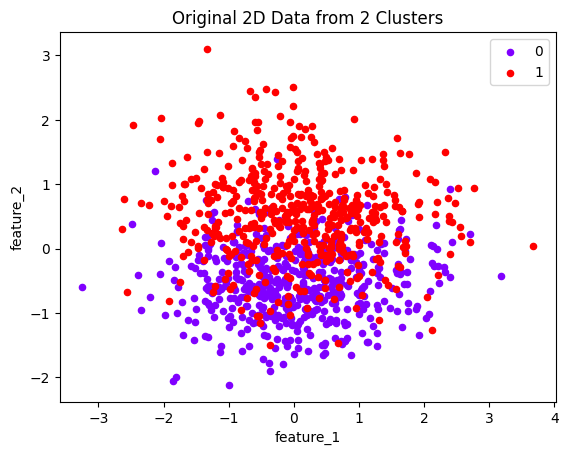

In [4]:
# scatter plot, data points annotated by different colors
df = pd.DataFrame(dict(feature_1=X[:,0], feature_2=X[:,1], label=y))


cluster_name = set(y)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', label=key, color=colors[key].reshape(1,-1))
    
pyplot.title('Original 2D Data from {} Clusters'.format(n_components))
pyplot.show()

In [5]:
# Create Test/Train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Simple KNeighborsClassifier 

In [6]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)

model.fit(X_train, y_train)
predictions= model.predict(X_test)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score: 0.645
              precision    recall  f1-score   support

           0       0.59      0.94      0.72        98
           1       0.86      0.36      0.51       102

    accuracy                           0.65       200
   macro avg       0.72      0.65      0.62       200
weighted avg       0.73      0.65      0.61       200



# BaggingClassifier using kNN

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=4),max_samples=0.5, max_features=0.5)


bagging.fit(X_train, y_train)
predictions= bagging.predict(X_test)
y_pred = bagging.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score: 0.665
              precision    recall  f1-score   support

           0       0.61      0.89      0.72        98
           1       0.81      0.45      0.58       102

    accuracy                           0.67       200
   macro avg       0.71      0.67      0.65       200
weighted avg       0.71      0.67      0.65       200



In [8]:
# Random Forests 

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)

# fit and check the results
model.fit(X_train, y_train)
predictions= model.predict(X_test)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score: 0.92
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        98
           1       0.92      0.92      0.92       102

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



# Voting Classifier

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=10, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.80 (+/- 0.03) [Logistic Regression]
Accuracy: 0.92 (+/- 0.02) [Random Forest]
Accuracy: 0.89 (+/- 0.02) [naive Bayes]
Accuracy: 0.89 (+/- 0.02) [Ensemble]


# Boosting - AdaBoost

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME")
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.931